In [0]:
#Restarting Runtime
!kill -9 -1

In [1]:
# inicjalizacja srodowiska
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110377 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [2]:
# tensorflow test
import tensorflow as tf
tf.test.gpu_device_name()
# powinno byc: '/device:GPU:0'
from tensorflow.python.client import device_lib
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# powinno być: cos z Tesla K80

# OpenCV
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
import os.path
import glob
import pickle
import itertools
import copy
from google.colab import files
!pip install word2number


Found GPU at: /device:GPU:0
  Running setup.py bdist_wheel for word2number ... - done
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [0]:
# dostep do plikow na drivie
!mkdir -p drive
!google-drive-ocamlfuse drive


In [4]:
# zmien folder na drive
os.chdir("drive")
os.chdir("Colab Notebooks")
os.chdir("POS tagging")
!ls -a
glob.glob('*')

.				final10.csv  final4.csv  final9.csv
..				final11.csv  final5.csv  POSTAG.ipynb
competition_dataset_labels.npy	final1.csv   final6.csv
competition_dataset.npy		final2.csv   final7.csv
competition_test.npy		final3.csv   final8.csv


['final8.csv',
 'final11.csv',
 'final5.csv',
 'final4.csv',
 'final9.csv',
 'competition_dataset.npy',
 'final3.csv',
 'final1.csv',
 'competition_test.npy',
 'competition_dataset_labels.npy',
 'final2.csv',
 'final7.csv',
 'final6.csv',
 'POSTAG.ipynb',
 'final10.csv']

In [0]:
#Load File
file_to_load = ['competition_dataset_labels.npy','competition_test.npy', 'competition_dataset.npy']
competition_dataset = np.load(file_to_load[2])
competition_dataset_labels = np.load(file_to_load[0])
competition_test = np.load(file_to_load[1])


In [0]:
def my_encode(sentence):
  tokenized_sentence = []
  for sentence in competition_dataset:
    for word in sentence:
      sum = 0
      for char in word:
        sum +=ord(char)
      tokenized_sentence.append(sum)
  return tokenized_sentence

def my_encode2(word):
  return_vector = []
  for letter in word:
    return_vector.append(ord(letter))
  return return_vector

def my_encode3(word):
  return_vector = []
  i = 0
  for letter in word:
    if letter in idex_dict:
      return_vector.append(idex_dict[letter])
    else:
      idex_dict[letter] = i
      i = i+1
      return_vector.append(idex_dict[letter])
      print(idex_dict)
  return return_vector

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     #   plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [8]:


idex_dict = {}
i = 0

def my_encode3(word):
  return_vector = []
  global i
  for letter in word:
    if letter in idex_dict:
      return_vector.append(idex_dict[letter])
    else:
      idex_dict[letter] = i
      i = i+1
      return_vector.append(idex_dict[letter])
  return return_vector

from keras.preprocessing.sequence import pad_sequences
flat_list = [item for sublist in competition_dataset for item in sublist]
dataset = pd.DataFrame(flat_list)
flat_list = [item for sublist in competition_dataset_labels for item in sublist]
dataset['labels'] = pd.DataFrame(flat_list)
dataset.columns = ['Sentence','Labels']
dataset['encode'] = dataset['Sentence'].map(my_encode3)
flat_list = [item for sublist in competition_test for item in sublist]
dataset1 = pd.DataFrame(flat_list)
dataset1.columns = ['Sentence']
dataset1['encode'] = dataset1['Sentence'].map(my_encode3)
print(dataset1.head())
print(dataset.head())
print(idex_dict)

'''
print(competition_dataset)
tokenized_sentence = []
for sentence in competition_dataset:
  for word in sentence:
    sum = 0
    for char in word:
      sum +=ord(char)
    tokenized_sentence.append(sum)
    
tokenized_sentence = np.asarray([tokenized_sentence])
padded_tokenized_sentence = pad_sequences(tokenized_sentence, maxlen=100)

print('The sentence is ', sentence)
print('The tokenized sentence is ',tokenized_sentence)
print('The padded tokenized sentence is ', padded_tokenized_sentence)
'''

Using TensorFlow backend.


  Sentence                      encode
0   Proces     [42, 30, 2, 16, 12, 14]
1    budzi            [6, 25, 9, 8, 7]
2  wielkie  [22, 7, 12, 19, 20, 7, 12]
3   emocje      [12, 1, 2, 16, 13, 12]
4        ,                         [5]
  Sentence  Labels        encode
0        A       7           [0]
1     mogę       5  [1, 2, 3, 4]
2        ,       1           [5]
3       bo      10        [6, 2]
4     moim       2  [1, 2, 7, 1]
{'A': 0, 'm': 1, 'o': 2, 'g': 3, 'ę': 4, ',': 5, 'b': 6, 'i': 7, 'z': 8, 'd': 9, 'a': 10, 'n': 11, 'e': 12, 'j': 13, 's': 14, 't': 15, 'c': 16, '.': 17, 'I': 18, 'l': 19, 'k': 20, 'ó': 21, 'w': 22, 'ą': 23, 'R': 24, 'u': 25, ':': 26, ')': 27, 'J': 28, 'p': 29, 'r': 30, 'y': 31, 'ś': 32, 'ł': 33, '"': 34, 'L': 35, 'v': 36, 'D': 37, 'N': 38, 'C': 39, "'": 40, '!': 41, 'P': 42, 'h': 43, 'M': 44, 'ż': 45, 'H': 46, 'O': 47, ';': 48, 'K': 49, '?': 50, 'T': 51, 'G': 52, '(': 53, '3': 54, '0': 55, '[': 56, ']': 57, 'W': 58, 'S': 59, 'ć': 60, 'B': 61, 'f': 62, '-': 63, '

"\nprint(competition_dataset)\ntokenized_sentence = []\nfor sentence in competition_dataset:\n  for word in sentence:\n    sum = 0\n    for char in word:\n      sum +=ord(char)\n    tokenized_sentence.append(sum)\n    \ntokenized_sentence = np.asarray([tokenized_sentence])\npadded_tokenized_sentence = pad_sequences(tokenized_sentence, maxlen=100)\n\nprint('The sentence is ', sentence)\nprint('The tokenized sentence is ',tokenized_sentence)\nprint('The padded tokenized sentence is ', padded_tokenized_sentence)\n"

In [9]:
flat_list = [item for sublist in competition_test for item in sublist]
dataset1 = pd.DataFrame(flat_list)
dataset1.columns = ['Sentence']
dataset1['encode'] = dataset1['Sentence'].map(my_encode2)
print(dataset1.head())

  Sentence                               encode
0   Proces         [80, 114, 111, 99, 101, 115]
1    budzi             [98, 117, 100, 122, 105]
2  wielkie  [119, 105, 101, 108, 107, 105, 101]
3   emocje        [101, 109, 111, 99, 106, 101]
4        ,                                 [44]


In [10]:
print(dataset)
dataset = dataset.drop_duplicates(['Sentence'])
print(drop)

               Sentence  Labels  \
0                     A       7   
1                  mogę       5   
2                     ,       1   
3                    bo      10   
4                  moim       2   
5               zdaniem       0   
6                  jest       5   
7                    do       3   
8               niczego       0   
9                     .       1   
10                    I       4   
11                   to       4   
12           delikatnie       8   
13               mówiąc      21   
14                    .       1   
15                    .       1   
16                    .       1   
17                Rzecz       0   
18                gustu       0   
19                   :)       0   
20                   Ja      16   
21                sobie      23   
22                    z       3   
23        przyjemnością       0   
24            obejrzała       6   
25                    m      17   
26              wczoraj       8   
27                  

NameError: ignored

In [11]:
#groupby('Labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 600)))
dataset_reduct = dataset
msk = np.random.rand(len(dataset_reduct)) < 0.8
train = dataset_reduct[msk]
test = dataset_reduct[~msk]
train_label = dataset['Labels']
train_features = dataset['encode']
test_label = test['Labels']
test_features = test['encode']
print(train_label.shape)

(143478,)


In [12]:
print(dataset['encode'].min())

from collections import Counter


train_label_list = list(train['Labels'])
Counter(train_label_list).keys() # equals to list(set(words))
Counter(train_label_list).values() # counts the elements' frequency


[0]


dict_values([6995, 62, 21905, 54441, 37, 270, 1855, 875, 42, 10, 9397, 113, 51, 375, 1147, 7, 15, 3455, 2881, 210, 220, 41, 5377, 28, 2388, 13, 59, 24, 893, 58, 766, 425, 99, 25, 11])

In [0]:
'''
df_sample = dataset.groupby('Labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 2000)))
train_label_list = list(df_sample['Labels'])
Counter(train_label_list).keys() # equals to list(set(words))
Counter(train_label_list).values() # counts the elements' frequency
'''

dict_values([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1555, 830, 824, 813, 588, 154, 131, 128, 118, 88])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, SimpleRNN
from keras.models import Sequential

from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [14]:
max_len = 20
input_dim = 127
sequences_matrix = sequence.pad_sequences(train_features,maxlen=max_len)
print(sequences_matrix)


def my_simple_RNN():
    inputs = Input(name='inputs',shape=[max_len])  # core layer of inputs
    layer1 = Embedding(input_dim=input_dim, output_dim=70, input_length=max_len)(inputs)  # embedding layer, that represents 
                                                             # letters of words indense vector representation. Layer will be max_len 
                                                             # vectors of 50 dim each
    layer2 = SimpleRNN(256)(layer1)  # LSTM layerwith 64 units (cells)
    layer3 = Dense(units=35,name='out_layer')(layer2)  # this is a classic core layer of perceprtons it takes as input matrix shaped
                                                      # as "layer5" and returns shape (*, 256). Layer without activation
    layer4 = Activation('softmax')(layer3)  # activation function (relu) applicated to the layer4
    model = Model(inputs=inputs,outputs=layer4)  # creates a model from layers above
    return model  
  

def my_LSTM():
    inputs = Input(name='inputs',shape=[max_len])  # core layer of inputs
    layer1 = Embedding(input_dim=input_dim, output_dim=50, input_length=max_len)(inputs)  # embedding layer, that represents 
                                                             # letters of words indense vector representation. Layer will be max_len 
                                                             # vectors of 50 dim each
    layer2 = LSTM(64)(layer1)  # LSTM layerwith 64 units (cells)
    layer3 = Dense(35,name='FC1')(layer2)  # this is a classic core layer of perceprtons it takes as input matrix shaped
                                                      # as "layer5" and returns shape (*, 256). Layer without activation
    layer4 = Activation('softmax')(layer3)  # activation function (relu) applicated to the layer4
    model = Model(inputs=inputs,outputs=layer4)  # creates a model from layers above
    return model
  
def my_LSTM2():
    inputs = Input(name='inputs',shape=[max_len])  # core layer of inputs
    layer1 = Embedding(input_dim=input_dim, output_dim=80, input_length=max_len)(inputs)  # embedding layer, that represents 
                                                             # letters of words indense vector representation. Layer will be max_len 
                                                             # vectors of 50 dim each
    layer2 = LSTM(256,return_sequences=True)(layer1)  # LSTM layerwith 64 units (cells)
    layer3 = Activation('relu')(layer2)  # activation function (relu) applicated to the layer4

    layer4 = LSTM(128)(layer3)  # LSTM layerwith 64 units (cells)
    layer5 = Dense(35,name='FC1')(layer4)  # this is a classic core layer of perceprtons it takes as input matrix shaped
                                                      # as "layer5" and returns shape (*, 256). Layer without activation
    layer6 = Activation('softmax')(layer5)  # activation function (relu) applicated to the layer4
    model = Model(inputs=inputs,outputs=layer6)  # creates a model from layers above
    return model

def my_LSTM3():
    inputs = Input(name='inputs',shape=[max_len])  # core layer of inputs
    layer1 = Embedding(input_dim=input_dim, output_dim=50, input_length=max_len)(inputs)  # embedding layer, that represents 
                                                             # letters of words indense vector representation. Layer will be max_len 
                                                             # vectors of 50 dim each
    layer2 = LSTM(64,return_sequences=True)(layer1)  # LSTM layerwith 64 units (cells)
    layer3 = Activation('relu')(layer2)  # activation function (relu) applicated to the layer4
    
    layer4 = LSTM(32,return_sequences=True)(layer3)  # LSTM layerwith 64 units (cells)
    layer5 = Activation('relu')(layer4)  # activation function (relu) applicated to the layer4
    
    layer6 = LSTM(16)(layer5)  # LSTM layerwith 64 units (cells)
    layer7 = Dense(35,name='FC1')(layer6)  # this is a classic core layer of perceprtons it takes as input matrix shaped
                                                      # as "layer5" and returns shape (*, 256). Layer without activation
    layer8 = Activation('softmax')(layer7)  # activation function (relu) applicated to the layer4
    model = Model(inputs=inputs,outputs=layer8)  # creates a model from layers above
    return model
  
def my_LSTM4():
    inputs = Input(name='inputs',shape=[max_len])  # core layer of inputs
    layer1 = Embedding(input_dim=input_dim, output_dim=70, input_length=max_len)(inputs)  # embedding layer, that represents 
                                                             # letters of words indense vector representation. Layer will be max_len 
                                                             # vectors of 50 dim each
    layer2 = LSTM(64,return_sequences=True)(layer1)  # LSTM layerwith 64 units (cells)
    layer3 = Activation('relu')(layer2)  # activation function (relu) applicated to the layer4
    
    layer4 = LSTM(32,return_sequences=True)(layer3)  # LSTM layerwith 64 units (cells)
    layer5 = Activation('relu')(layer4)  # activation function (relu) applicated to the layer4
    
    layer6 = LSTM(16,return_sequences=True)(layer5)  # LSTM layerwith 64 units (cells)
    layer7 = Activation('relu')(layer6)  # activation function (relu) applicated to the layer4
    
    layer8 = LSTM(8)(layer7)  # LSTM layerwith 64 units (cells)
    layer9 = Dense(35,name='FC1')(layer8)  # this is a classic core layer of perceprtons it takes as input matrix shaped
                                                      # as "layer5" and returns shape (*, 256). Layer without activation
    layer10 = Activation('softmax')(layer9)  # activation function (relu) applicated to the layer4
    model = Model(inputs=inputs,outputs=layer10)  # creates a model from layers above
    return model

  
def my_GRU():
    inputs = Input(name='inputs',shape=[max_len])  # core layer of inputs
    layer1 = Embedding(input_dim=input_dim, output_dim=70, input_length=max_len)(inputs)  # embedding layer, that represents 
                                                             # letters of words indense vector representation. Layer will be max_len 
                                                             # vectors of 50 dim each
    layer2 = GRU(512)(layer1)  # LSTM layerwith 64 units (cells)
    layer3 = Dense(35,name='FC1')(layer2)  # this is a classic core layer of perceprtons it takes as input matrix shaped
                                                      # as "layer5" and returns shape (*, 256). Layer without activation
    layer4 = Activation('softmax')(layer3)  # activation function (relu) applicated to the layer4
    model = Model(inputs=inputs,outputs=layer4)  # creates a model from layers above
    return model
  


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  2  3  4]
 [ 0  0  0 ...  0  0  5]
 ...
 [ 0  0  0 ... 11 12 13]
 [ 0  0  0 ...  8 11 23]
 [ 0  0  0 ...  7 12 67]]


In [15]:
model = my_GRU()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 20)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 20, 70)            8890      
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               895488    
_________________________________________________________________
FC1 (Dense)                  (None, 35)                17955     
_________________________________________________________________
activation_1 (Activation)    (None, 35)                0         
Total params: 922,333
Trainable params: 922,333
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(train_label, num_classes=35)
batch_size = 100
epochs = 10
validation_split = 0.0001

model.fit(sequences_matrix, categorical_labels, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Train on 143463 samples, validate on 15 samples
Epoch 1/10
143463/143463 [==============================] - 86s 599us/step - loss: 0.0666 - acc: 0.9761 - val_loss: 0.0213 - val_acc: 1.0000
Epoch 2/10
143463/143463 [==============================] - 86s 602us/step - loss: 0.0610 - acc: 0.9783 - val_loss: 0.0401 - val_acc: 1.0000
Epoch 3/10
143463/143463 [==============================] - 86s 601us/step - loss: 0.0564 - acc: 0.9796 - val_loss: 0.1588 - val_acc: 0.8667
Epoch 4/10
 76900/143463 [===============>..............] - ETA: 39s - loss: 0.0487 - acc: 0.9827

KeyboardInterrupt: ignored

28908/28908 [==============================] - 19s 658us/step
Test set
  Loss: 0.044
  Accuracy: 0.985
[[13919     1    45 ...     0     0     0]
 [    0    14     0 ...     0     0     0]
 [   32     0  5353 ...     0     0     0]
 ...
 [    0     0     0 ...     4     0     0]
 [    2     0     0 ...     0    13     0]
 [    0     0     0 ...     0     0     1]]
Normalized confusion matrix
[[9.90746672e-01 7.11794434e-05 3.20307495e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.88559868e-03 0.00000000e+00 9.84550303e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.33333333e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.66666667e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


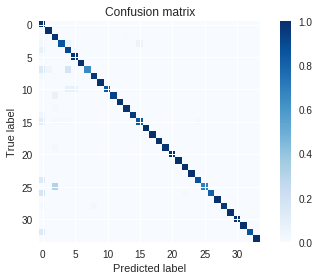

In [18]:
test_sequences_matrix = sequence.pad_sequences(test_features,maxlen=max_len)
categorical_labels = to_categorical(test_label, num_classes=35)
accr = model.evaluate(test_sequences_matrix,categorical_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

predictions = model.predict(test_sequences_matrix)

matrix = sklearn.metrics.confusion_matrix(list(test_label), predictions.argmax(axis=1))
print(matrix)
labels = list(range(35))
plot_confusion_matrix(matrix,labels, title='Confusion matrix',normalize =True)

In [19]:
print(matrix)

[[13919     1    45 ...     0     0     0]
 [    0    14     0 ...     0     0     0]
 [   32     0  5353 ...     0     0     0]
 ...
 [    0     0     0 ...     4     0     0]
 [    2     0     0 ...     0    13     0]
 [    0     0     0 ...     0     0     1]]


In [0]:
test_comp_features = dataset1['encode']
competition_testing = sequence.pad_sequences(test_comp_features,maxlen=max_len)
predictions_test = model.predict(competition_testing)
final_predict = predictions_test.argmax(axis=1)



In [21]:
def list_of_list_like(list_of_list,predictions):
  new_list = []
  i = 0
  for l in list_of_list:
    temp_list = []
    for word in l:
      temp_list.append(predictions[i])
      i= i+1
    new_list.append(temp_list)
  return new_list

predict = list_of_list_like(competition_test,final_predict)
print(predict)
id = list(range(1,(len(final_predict)+1)))
df1 = pd.DataFrame(
    {'id': id,
     'labels': final_predict
    })

[[0, 0, 2, 0, 15, 0, 0, 0, 0, 0, 15, 0, 0, 15, 0, 2, 0, 0, 0, 0, 2, 0, 0, 15], [0, 9, 15, 0, 15, 0, 0, 19, 0, 0, 0, 1, 0, 9, 0, 25, 0, 0, 0, 15, 0, 1, 0, 25, 1, 0, 0, 0, 0, 0, 0, 15, 0, 0, 19, 0, 25, 2, 15, 0, 5, 0, 0, 0, 0, 0, 0, 0, 15], [0, 19, 1, 15, 0, 2, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 9, 15, 1, 0, 2, 1, 0, 15, 0, 0, 0, 0, 0, 1, 1, 19, 0, 15, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 15], [9, 1, 0, 0, 0, 15, 0, 9, 0, 0, 0, 1, 0, 0, 0, 0, 0, 15], [1, 0, 6], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 25, 15], [0, 0, 0, 0, 15, 0, 0, 15], [0, 0, 0, 0, 15, 0, 0, 15, 0, 15, 0, 9, 0, 15, 2, 0, 9, 9, 0, 0, 9, 1, 1, 0, 15, 0, 0, 15, 15, 15], [0, 0, 0, 0, 0, 0, 15, 15], [0, 9, 1, 0, 1, 0, 0, 15, 0, 0, 1, 0, 0, 0, 15], [0, 0, 0, 25, 0, 0, 15, 2, 0, 0, 0, 0, 15], [0, 0, 25, 9, 9, 15, 9, 0, 9, 0, 0, 15, 0, 0, 2, 0, 0, 15, 0, 15, 0, 0, 0, 0, 0, 0, 0, 15], [0, 0, 0, 1], [0, 0, 15], [0, 1, 2, 0, 0, 0, 0, 0, 15], [0, 0, 1, 0, 1, 

In [22]:
print(df1.tail())

          id  labels
27354  27355       0
27355  27356       0
27356  27357       0
27357  27358       0
27358  27359       0


In [0]:
df1.to_csv('final12.csv',index = False)